In [1]:
import matplotlib.pyplot as plt
import seaborn as sb

import pandas as pd
import numpy as np

In [2]:
#opening json file
df_b = pd.read_json('yelp_academic_dataset_business.json', lines=True)

In [3]:
df_b

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,Eleven Oaks Realty,,Austin,TX,78701,30.272921,-97.744386,4.0,8,1,None,"Real Estate, Real Estate Services, Home Servic...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ..."
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Health Markets, Food, Specialty Food, Grocery","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,2164 S Chickasaw Trl,Orlando,FL,32825,28.511615,-81.270020,5.0,8,0,"{'DogsAllowed': 'False', 'ByAppointmentOnly': ...","Arts & Entertainment, Paint & Sip, Art Classes...","{'Monday': '0:0-0:0', 'Wednesday': '12:0-17:0'..."
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Cuban, Sandwiches, Restaurants, Cafes",None


In [4]:
#we want to study only restaurants and bars so we drop all the other activities
df_b.dropna( axis=0, how="any", thresh=None, subset=None, inplace=True)
df_activities=df_b[df_b.categories.str.contains("Restaurants", na=False)==True]

It could be interesting to study how the average ratings changes in different cities. First of all, for a meaningful analysis we will remove the closed restaurants.

In [5]:
df_activities = df_activities[df_activities.is_open==1]

In [6]:
df_activities

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
13,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160562,cgNDiWCaSlqqxx1A6r65bA,Hop N Cork,17450 Lower Boones Ferry Rd,Lake Oswego,OR,97035,45.399154,-122.737600,4.0,137,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Nightlife, Wine Bars, Beer Bar, Bars, Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-20:0', ..."
160563,yQL8SrSETbbCI1U5esVJQw,Ciao! Pizza & Pasta,59 Williams St,Chelsea,MA,02150,42.389221,-71.040882,5.0,733,1,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Restaurants, Pizza, Italian","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
160572,r5Uag1JqYjr2nbxQCVqm8A,Saigon Noodle & Grill,101 N Bumby Ave,Orlando,FL,32803,28.544430,-81.351606,4.5,437,1,"{'Alcohol': 'u'beer_and_wine'', 'RestaurantsAt...","Restaurants, Noodles, Salad, Vietnamese, Veget...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:30'..."
160574,Q78fYV6B6P6GmX07YVgi4g,Maudie’s Hill Country,12506 Shops Pkwy,Bee Cave,TX,78738,30.304761,-97.937394,3.0,310,1,"{'BusinessParking': '{'garage': False, 'street...","Mexican, Bars, Nightlife, Tex-Mex, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', '..."


Now, we group by city and we look for the average of the stars.

In [7]:
df_activities.groupby(by='city').mean('stars').drop(columns=['latitude', 'longitude', 'is_open', 'review_count']).sort_values(by = 'stars', ascending=False)

,stars
city,
portland,5.0
columbus,5.0
Northeast Orlando,5.0
Winter park,5.0
Union Park,5.0
...,...
Sheridan,1.5
Englewood,1.5
E.Point,1.5


As we can see, there are a lot of cities with the average stars=5, but how many of them have just a few reviews ?

Now, we will look at how many reviews each city has in order to decide how to select a meaningful thereshold and consider only the cities such that the review count is bigger than the threshold.

In [8]:
df_rev = df_activities.groupby(by='city').count().drop(columns= ['business_id', 'name', 'address', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
                                                       'is_open', 'attributes', 'categories', 'hours'])

Now that we have for each city the review count we can ask ourself: what is the mean of the review count ?

In [9]:
df_rev.mean()

review_count    72.551899
dtype: float64

What are the maximum and the minimum of the review count ?

In [10]:
print('the maximum is: ', df_rev.max())

the maximum is:  review_count    2842
dtype: int64


In [11]:
print('the minimum is:', df_rev.min())

the minimum is: review_count    1
dtype: int64


What about the median ?

In [12]:
print('the median is: ', df_rev.median())

the median is:  review_count    8.0
dtype: float64


The median is a very important value. It allows us to notice that the percentage of review counts smaller or equal than 8 is 50%. This mean that the number of reviews in different cities is small in general. To have a better understanding we can plot the distribution.

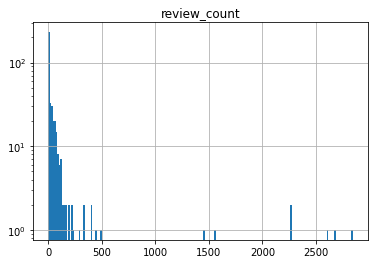

In [13]:
df_rev.hist(bins=200, log=True)
plt.show()

As we can see, the distribution is very left-skewed, it means that the majority of the cities has a very few reviews. We will then consider simply cities with more than 100 reviews to have a meaningful analysis.

In [14]:
df_rev = df_rev[df_rev['review_count']>100]

In [15]:
df_rev

,review_count
city,
Altamonte Springs,142
Atlanta,2263
Austin,2601
Beaverton,338
Boston,1464
Boulder,341
Brookline,123
Burnaby,400
Cambridge,404


In [16]:
df_rev.shape

(38, 1)

As we can see, we have removed a lot of cities. Just 38/350 cities remain there.

In [17]:
list_cities = df_rev.index.tolist()

In [18]:
list_cities

['Altamonte Springs',
 'Atlanta',
 'Austin',
 'Beaverton',
 'Boston',
 'Boulder',
 'Brookline',
 'Burnaby',
 'Cambridge',
 'Clermont',
 'Columbus',
 'Coquitlam',
 'Decatur',
 'Dublin',
 'Hilliard',
 'Kissimmee',
 'Lake Mary',
 'Lake Oswego',
 'New Westminster',
 'Newton',
 'North Vancouver',
 'Orlando',
 'Oviedo',
 'Portland',
 'Quincy',
 'Richmond',
 'Salem',
 'Sanford',
 'Smyrna',
 'Somerville',
 'Surrey',
 'Tigard',
 'Tucker',
 'Vancouver',
 'Waltham',
 'Westerville',
 'Winter Garden',
 'Winter Park']

We select from the dataframe of the restaurants, the ones whose city is in the list above.

In [19]:
df_activities = df_activities[df_activities['city'].isin(list_cities)]

We will print the ten cities with the highest number of average stars for restaurants

In [20]:
df_to_visualize = df_activities.groupby(by='city').mean('stars').sort_values('stars', ascending=False).drop(columns= ['latitude', 'longitude', 'is_open', 'review_count'])[0:10]
df_to_visualize

,stars
city,
Portland,3.890570
Winter Park,3.848624
Somerville,3.829694
Brookline,3.768293
Boulder,3.749267
Lake Oswego,3.735294
Austin,3.727028
Cambridge,3.702970
Salem,3.683333


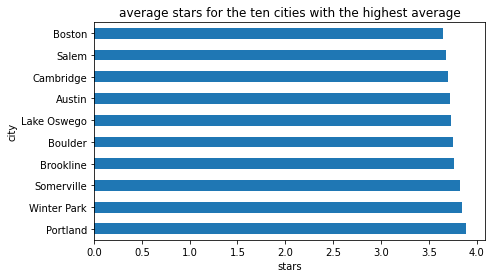

In [21]:
plt.rcParams["figure.figsize"] = (7,4)
ax = df_to_visualize.plot(kind = 'barh')
ax.get_legend().remove()
plt.title('average stars for the ten cities with the highest average')
plt.xlabel('stars')
plt.show()

As we can notice, the city with the highest average star is Portland with an average of 3.89 stars

Are all these cities close to each other or are they far from each other ?

In [22]:
df_activities

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
13,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18..."
16,GfWJ19Js7wX9rwaHQ7KbGw,Everything POP Shopping & Dining,1050 Century Dr,Orlando,FL,32830,28.350498,-81.542819,3.0,7,1,"{'HasTV': 'False', 'Caters': 'False', 'Busines...","Restaurants, American (New), Food Court, Flowe...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160556,87f7kR7nTz8WHnmtLM_S6w,O Ya,9 East St Pl,Boston,MA,02111,42.351408,-71.056867,4.5,737,1,"{'RestaurantsPriceRange2': '4', 'RestaurantsGo...","Japanese, Sushi Bars, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '17:0-21:30',..."
160561,jYgqSazE0gUyI7qq086Dzw,Chart House,5700 SW Terwilliger,Portland,OR,97239,45.483154,-122.682748,3.5,457,1,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Event Planning & Services, Steakhouses, Seafoo...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21..."
160562,cgNDiWCaSlqqxx1A6r65bA,Hop N Cork,17450 Lower Boones Ferry Rd,Lake Oswego,OR,97035,45.399154,-122.737600,4.0,137,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Nightlife, Wine Bars, Beer Bar, Bars, Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-20:0', ..."
160572,r5Uag1JqYjr2nbxQCVqm8A,Saigon Noodle & Grill,101 N Bumby Ave,Orlando,FL,32803,28.544430,-81.351606,4.5,437,1,"{'Alcohol': 'u'beer_and_wine'', 'RestaurantsAt...","Restaurants, Noodles, Salad, Vietnamese, Veget...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:30'..."


In [23]:
from mpl_toolkits.basemap import Basemap

In [24]:
lat = df_activities['latitude'].values
lon = df_activities['longitude'].values
population = df_activities['review_count']

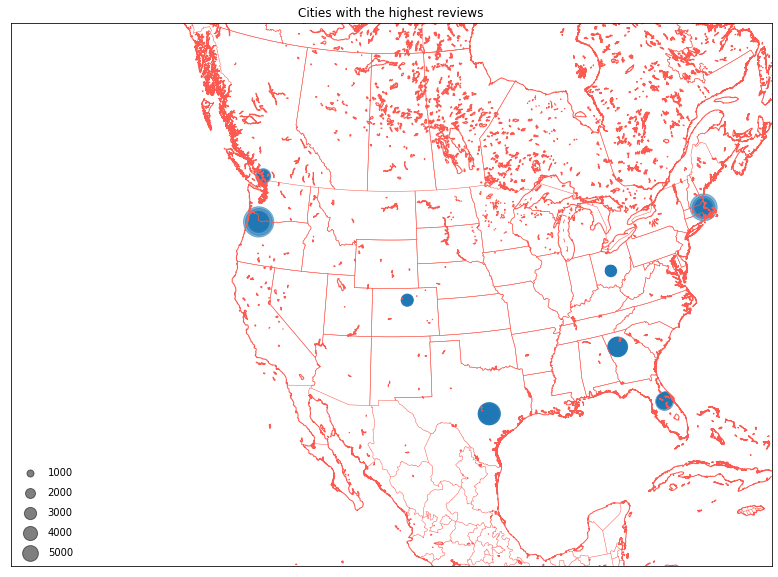

In [25]:
# 1. Draw the map background
fig = plt.figure(figsize=(20, 10))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=40.5, lon_0=-107,
            width=7.0E6, height=5.0E6)
#m.shadedrelief()
m.drawcoastlines(color='xkcd:coral')
m.drawcountries(color='xkcd:coral')
m.drawstates(color='xkcd:coral')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          s=population/10,cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
#plt.colorbar(label='Number of reviews')
#plt.clim(0,10000 )

# make legend with dummy points
for i in [50, 100, 150, 200, 250]:
    plt.scatter([], [], c='k', alpha=0.5, s=i,
                label=str(i*2*10))
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left')
plt.title('Cities with the highest reviews')
plt.show()

In [26]:
list_df=[]
for i in range(1, 19):
    print(i)
    df = pd.read_csv('review'+str(i)+'.csv')
    df.drop(['text','review_id','user_id','funny','cool'], axis=1)
    list_df.append(df)
reviews = pd.concat(list_df)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


As we can see we can conclude that there is not a geografical association between the most liked restaurants.

In [27]:
reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01
...,...,...,...,...,...,...,...,...,...
135398,PHnqMOU1pzHbnUMk3Cg2zA,6olZ0y9oW9azON61AhwxYg,yyTtwwQ4JnQMJ2rn3W0S0g,1,0,0,0,"In December, I called in (as a returning custo...",2021-01-26 04:07:14
135399,dViF8gg9745CszpekNvp2g,EPYNZQFuSKqLi-on3U9dFg,RDgwjgbu5xziFIAaNn3WCQ,1,13,1,0,This guy is a moron that will stalk and harass...,2019-05-01 21:21:43
135400,7vNXRIClt-9rFzMXlrtMXA,tr13Jb83h2itjyXVwaO5eA,rbuj2X4SXIc3MDul4dcxIA,5,39,13,34,"Yummy, great chew on the bagel\nFriendly staff...",2020-06-13 02:39:26
135401,Ho57jz6U-JjrGHpGWIGLNg,HqdmRMpNvScFxjGAB40vgQ,IRzjEZ2pX4iOpnBG7oZJ7g,2,2,0,0,This used to be my car wash of choice. They di...,2020-06-22 21:54:10


In [28]:
reviews.to_pickle('reviews')

In [29]:
reviews = pd.read_pickle('reviews')

In [30]:
reviews = reviews.sample(10000)

It would be interesting to know if there is any correlation between a good rating of an activity and the dates (months/years/days)

In [31]:
#opening json file
df_b = pd.read_json('yelp_academic_dataset_business.json', lines=True)
#we want to study only restaurants and bars so we drop all the other activities
df_b.dropna( axis=0, how="any", thresh=None, subset=None, inplace=True)
df_activities=df_b[df_b.categories.str.contains("Restaurants", na=False)==True]

In [32]:
final_df = pd.merge(df_activities,reviews, right_on='business_id', left_on='business_id')

In [33]:
final_df.to_pickle('final_df_ratings_an')

In [84]:
final_df = pd.read_pickle('final_df_ratings_an')

In [85]:
final_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,...,"Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",JkmYVWIu4P9IspeLVV8Yxg,XHmpu1NsPx06bqnJ61HX2g,1,0,0,0,Would've given this place a 5 star review for ...,2017-10-07 02:12:47
1,jGennaZUr2MsJyRhijNBfA,Legal Sea Foods,1 Harborside Dr,Boston,MA,02128,42.363442,-71.025781,3.5,856,...,"Sandwiches, Food, Restaurants, Breakfast & Bru...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ...",epJw_SUHX9Kdu4-trccwew,r-Brk55Aricqz06b4ddxtA,4,0,0,0,Great Experience. Wait staff was more on point...,2017-01-03 01:09:29
2,jGennaZUr2MsJyRhijNBfA,Legal Sea Foods,1 Harborside Dr,Boston,MA,02128,42.363442,-71.025781,3.5,856,...,"Sandwiches, Food, Restaurants, Breakfast & Bru...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ...",tTHA8ZwKITTBYsKAc4CfIw,GxaGNSTTAKZnBJ_IZdru2A,1,0,0,0,worst food selection \nvery expensive \nrude w...,2017-08-14 23:00:38
3,QciD6FbNklaJvUbLExD4Nw,ARGO,"3790 Canada Way, Unit 108",Burnaby,BC,V5G 1G4,49.254436,-123.020050,4.0,76,...,"Food Delivery Services, Food, Restaurants, Med...","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',...",nTjxPhX5z8acnGAmc7qfZA,xMlJDjylJ9BpB0DbYfA-PA,5,0,0,0,Hello-\nMy LSC wanted Lamb.\nThis restaurant i...,2018-05-06 14:55:33
4,bRsDZ44CD3uhGnRY3NeQhQ,Wendy's,6247 Mcneil Drive,Austin,TX,78729,30.441875,-97.746581,2.0,46,...,"Fast Food, Restaurants, Burgers","{'Monday': '6:30-1:0', 'Tuesday': '6:30-1:0', ...",fI6VC9mINBd5J689LZfjRg,q7nwHfvxdf-ljcNzdhWIaQ,1,0,0,0,I watched one of the workers open a bag of nug...,2016-08-16 18:13:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,87f7kR7nTz8WHnmtLM_S6w,O Ya,9 East St Pl,Boston,MA,02111,42.351408,-71.056867,4.5,737,...,"Japanese, Sushi Bars, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '17:0-21:30',...",Yp2jhpjCpExChWtN4V9rYg,DICLJDdq0HpvOVYR5mB4gA,5,14,2,3,Mind-Blowing. 'Nuff said.\n\n...You didn't re...,2012-01-28 21:11:32
6233,jYgqSazE0gUyI7qq086Dzw,Chart House,5700 SW Terwilliger,Portland,OR,97239,45.483154,-122.682748,3.5,457,...,"Event Planning & Services, Steakhouses, Seafoo...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",Oieuw4M5pGFDh534LOJfww,8jygq-RDX-LCSwkAnn9DJQ,1,2,0,0,I left this restaurant very frustrated. I felt...,2019-11-02 04:08:10
6234,cgNDiWCaSlqqxx1A6r65bA,Hop N Cork,17450 Lower Boones Ferry Rd,Lake Oswego,OR,97035,45.399154,-122.737600,4.0,137,...,"Nightlife, Wine Bars, Beer Bar, Bars, Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-20:0', ...",witMRs82CxeWNIxv-eMmKA,1TMMG6XD7_Ca542RXfvXcg,5,0,0,0,Very pleasantly surprised how tasty the Kalua ...,2020-10-26 21:06:59
6235,yQL8SrSETbbCI1U5esVJQw,Ciao! Pizza & Pasta,59 Williams St,Chelsea,MA,02150,42.389221,-71.040882,5.0,733,...,"Restaurants, Pizza, Italian","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",N0j4vo-icUdy-5QLKNbCng,VXgQlPIwC9MVU5dE34ki9w,4,0,0,0,Chelsea based Italian Ciao is fantastic for mo...,2020-10-24 16:12:55


In [86]:
df_dates = final_df.drop(columns=['name', 'address', 'state', 'postal_code', 'latitude', 'longitude','stars_x', 'review_count', 'categories', 'hours', 'is_open',
                                 'attributes', 'user_id', 'useful', 'funny', 'cool', 'text', 'business_id', 'city', 'review_id'])

In [87]:
df_dates

,stars_y,date
0,1,2017-10-07 02:12:47
1,4,2017-01-03 01:09:29
2,1,2017-08-14 23:00:38
3,5,2018-05-06 14:55:33
4,1,2016-08-16 18:13:27
...,...,...
6232,5,2012-01-28 21:11:32
6233,1,2019-11-02 04:08:10
6234,5,2020-10-26 21:06:59
6235,4,2020-10-24 16:12:55


In [88]:
from datetime import datetime

In [89]:
df_dates.date = df_dates['date'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [90]:
df_dates.groupby(df_dates['date'].dt.year)["stars_y"].mean()

date
2005    4.666667
2006    3.857143
2007    3.730769
2008    3.752381
2009    3.687500
2010    3.761261
2011    3.719870
2012    3.690058
2013    3.714286
2014    3.804040
2015    3.706870
2016    3.834746
2017    3.801887
2018    3.720253
2019    3.835476
2020    3.838631
2021    3.514286
Name: stars_y, dtype: float64

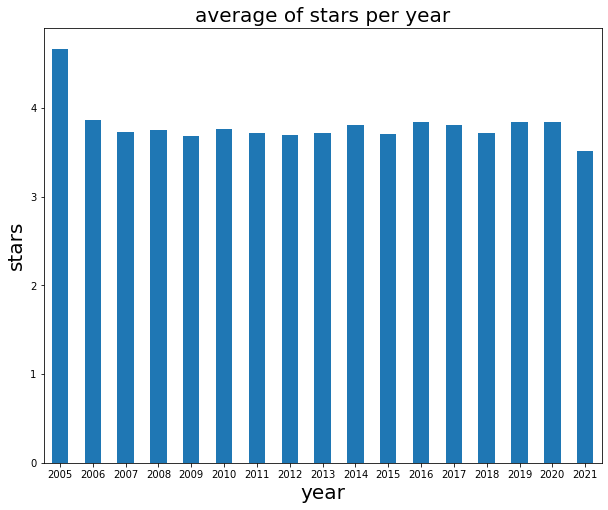

In [92]:
df_dates.groupby(df_dates['date'].dt.year)["stars_y"].mean().plot(
    kind='bar', rot=0, figsize=(10,8))
plt.ylabel('stars', fontsize=20)
plt.xlabel('year', fontsize=20)
plt.title('average of stars per year', fontsize=20)
plt.show()

As we can see the year in which the reviews were more positive was 2005, is this result significant ? We add confidence intervals

In [93]:
df_dates.groupby(df_dates['date'].dt.year)["stars_y"].get_group(2005)

1167    5
3945    5
5279    4
Name: stars_y, dtype: int64

In [94]:
def bootstrap_CI(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)]

In [95]:
lengths = []
for i in range(2005, 2022):
    data = df_dates.groupby(df_dates['date'].dt.year)["stars_y"].get_group(i).values
    lengths.append(bootstrap_CI(data, 1000)[1]-bootstrap_CI(data, 1000)[0])
print(lengths)

[1.0, 0.8571428571428572, 0.5581730769230759, 0.4285714285714288, 0.3500000000000001, 0.2927927927927927, 0.254153094462541, 0.2603070175438593, 0.2333333333333334, 0.21621212121212086, 0.21374045801526753, 0.18937146892655354, 0.1954514824797844, 0.20382911392405045, 0.19421593830334194, 0.27151589242053786, 1.0]


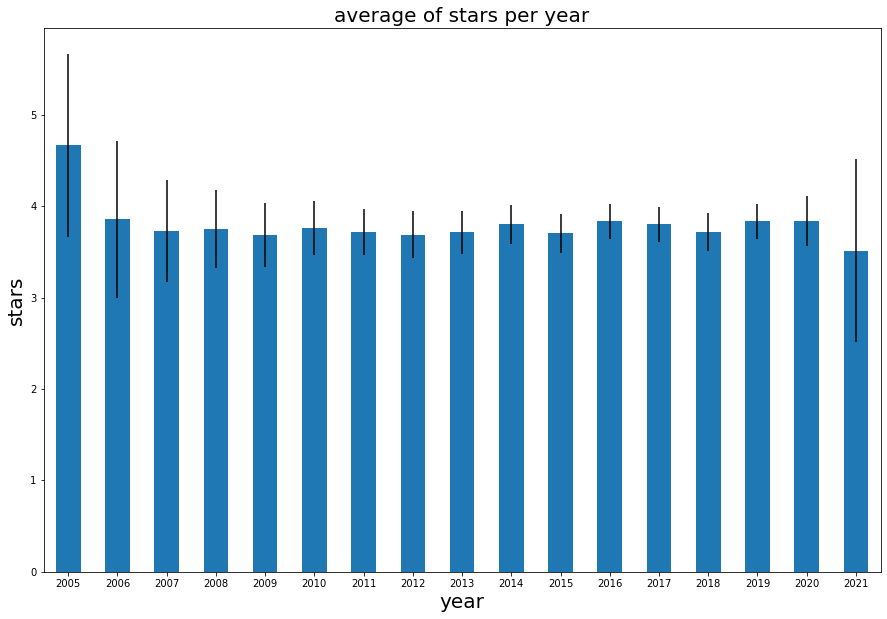

In [96]:
df_dates.groupby(df_dates['date'].dt.year)["stars_y"].mean().plot(
    kind='bar', rot=0, figsize=(15,10), yerr = lengths)
plt.ylabel('stars', fontsize=20)
plt.xlabel('year', fontsize=20)
plt.title('average of stars per year', fontsize=20)
plt.show()

In [ ]:
import scipy

In [47]:
def difference_means_years(years):
    year1 = df_dates.groupby(df_dates['date'].dt.year)["stars_y"].get_group(years[0]).values
    year2 = df_dates.groupby(df_dates['date'].dt.year)["stars_y"].get_group(years[1]).values
    print('the result of the T-test for the years', years, 'is')
    print(scipy.stats.ttest_ind(year1, year2))

In [48]:
for i in range(2005,2022):
    for j in range(i,2022):
        difference_means_years([i,j])

the result of the T-test for the years [2005, 2005] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test for the years [2005, 2006] is
Ttest_indResult(statistic=1.5295259204356118, pvalue=0.1469468044646314)
the result of the T-test for the years [2005, 2007] is
Ttest_indResult(statistic=1.548713615724422, pvalue=0.12740174065869556)
the result of the T-test for the years [2005, 2008] is
Ttest_indResult(statistic=1.3980271731807965, pvalue=0.16502345988724668)
the result of the T-test for the years [2005, 2009] is
Ttest_indResult(statistic=1.3619978004516722, pvalue=0.17510117628753474)
the result of the T-test for the years [2005, 2010] is
Ttest_indResult(statistic=1.3275858783039973, pvalue=0.18567237477685306)
the result of the T-test for the years [2005, 2011] is
Ttest_indResult(statistic=1.41003367287475, pvalue=0.15953876370432687)
the result of the T-test for the years [2005, 2012] is
Ttest_indResult(statistic=1.3707085927493259, pvalue=0.17136210363247653)
the

the result of the T-test for the years [2010, 2014] is
Ttest_indResult(statistic=-0.4348928702661439, pvalue=0.6637714184023741)
the result of the T-test for the years [2010, 2015] is
Ttest_indResult(statistic=0.516948147497328, pvalue=0.6053229937693894)
the result of the T-test for the years [2010, 2016] is
Ttest_indResult(statistic=-0.7349311866792048, pvalue=0.46256707994277235)
the result of the T-test for the years [2010, 2017] is
Ttest_indResult(statistic=-0.3923701227439048, pvalue=0.6948716733396642)
the result of the T-test for the years [2010, 2018] is
Ttest_indResult(statistic=0.38234181818529506, pvalue=0.7022882781268025)
the result of the T-test for the years [2010, 2019] is
Ttest_indResult(statistic=-0.7088758828828398, pvalue=0.4785670545650348)
the result of the T-test for the years [2010, 2020] is
Ttest_indResult(statistic=-0.6754078372391129, pvalue=0.49966490052431045)
the result of the T-test for the years [2010, 2021] is
Ttest_indResult(statistic=1.10220451051913

The t-test quantifies the difference between the arithmetic means of the two samples. The p-value quantifies the probability of observing as or more extreme values assuming the null hypothesis, that the samples are drawn from populations with the same population means, is true. A p-value larger than a chosen threshold (in this case 0.05) indicates that our observation is not so unlikely to have occurred by chance. Therefore, we do not reject the null hypothesis of equal population means.

The results are explained in the report

We repeat the same analysis for months

In [97]:
df_dates.groupby(df_dates['date'].dt.month)["stars_y"].mean()

date
1     3.742268
2     3.828343
3     3.746350
4     3.810526
5     3.785571
6     3.815175
7     3.759016
8     3.746858
9     3.805328
10    3.863366
11    3.661017
12    3.668724
Name: stars_y, dtype: float64

In [98]:
lengths = []
for i in range(1, 13):
    data = df_dates.groupby(df_dates['date'].dt.month)["stars_y"].get_group(i).values
    lengths.append(bootstrap_CI(data, 1000)[1]-bootstrap_CI(data, 1000)[0])
print(lengths)

[0.22341065292096207, 0.22559880239520957, 0.21902372262773717, 0.24631578947368427, 0.2244989979959917, 0.22373540856031093, 0.21315573770491802, 0.21728007181328568, 0.2377049180327866, 0.22579207920792044, 0.2584745762711864, 0.2593621399176951]


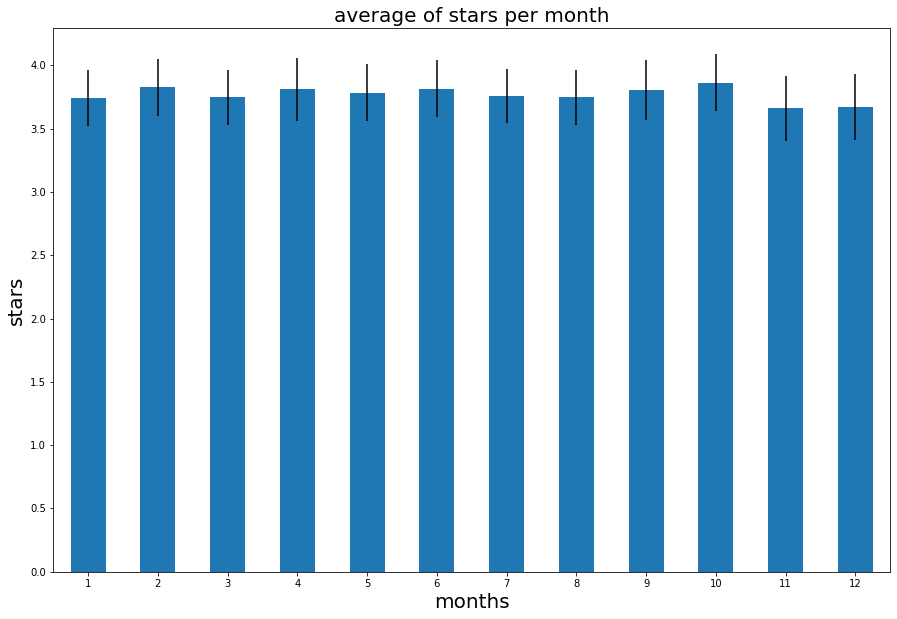

In [99]:
df_dates.groupby(df_dates['date'].dt.month)["stars_y"].mean().plot(
    kind='bar', rot=0, figsize=(15,10), yerr = lengths)
plt.ylabel('stars', fontsize=20)
plt.xlabel('months', fontsize=20)
plt.title('average of stars per month', fontsize=20)
plt.show()

We make a t-test for the two months with the biggest difference in mean.

In [100]:
def difference_means_months(months):
    month1 = df_dates.groupby(df_dates['date'].dt.month)["stars_y"].get_group(months[0]).values
    month2 = df_dates.groupby(df_dates['date'].dt.month)["stars_y"].get_group(months[1]).values
    print('the result of the T-test for the months', months, 'is')
    print(scipy.stats.ttest_ind(month1, month2))

In [101]:
for i in range(1,13):
    for j in range(i,13):
        difference_means_months([i,j])

the result of the T-test for the months [1, 1] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test for the months [1, 2] is
Ttest_indResult(statistic=-1.0719489400771327, pvalue=0.28398221940790036)
the result of the T-test for the months [1, 3] is
Ttest_indResult(statistic=-0.051060314734831996, pvalue=0.9592864990232719)
the result of the T-test for the months [1, 4] is
Ttest_indResult(statistic=-0.8207869219019729, pvalue=0.41195306842496315)
the result of the T-test for the months [1, 5] is
Ttest_indResult(statistic=-0.5335567254109816, pvalue=0.5937581436501012)
the result of the T-test for the months [1, 6] is
Ttest_indResult(statistic=-0.9118803355775021, pvalue=0.3620326038014493)
the result of the T-test for the months [1, 7] is
Ttest_indResult(statistic=-0.21263246127055807, pvalue=0.8316500667973377)
the result of the T-test for the months [1, 8] is
Ttest_indResult(statistic=-0.05774614801380432, pvalue=0.9539609807051495)
the result of the T-test for the 

The results are explained in the report

We could repeat the same analysis clustering the months by season.

In [102]:
summer = [6,7,8] #summer is june, july,august
autumn = [9,10,11]
spring = [3,4,5]
winter = [12,1,2]

In [103]:
column_to_add = []
for el in df_dates['date'].dt.month:
    if el in summer:
        column_to_add.append('sum')
    if el in autumn:
        column_to_add.append('aut')
    if el in spring:
        column_to_add.append('spr')
    if el in winter:
        column_to_add.append('win')
df_dates['period']=column_to_add

In [104]:
df_dates

,stars_y,date,period
0,1,2017-10-07 02:12:47,aut
1,4,2017-01-03 01:09:29,win
2,1,2017-08-14 23:00:38,sum
3,5,2018-05-06 14:55:33,spr
4,1,2016-08-16 18:13:27,sum
...,...,...,...
6232,5,2012-01-28 21:11:32,win
6233,1,2019-11-02 04:08:10,aut
6234,5,2020-10-26 21:06:59,aut
6235,4,2020-10-24 16:12:55,aut


In [105]:
df_dates.groupby(by='period').mean()

,stars_y
period,
aut,3.778840
spr,3.779238
sum,3.772159
win,3.746973


In [106]:
lengths_CI = []
seasons = ['sum','aut', 'spr', 'win']
for season in seasons:
    data = df_dates.groupby(by='period')["stars_y"].get_group(season).values
    lengths_CI.append(bootstrap_CI(data, 1000)[1]-bootstrap_CI(data, 1000)[0])
print(lengths_CI)

[0.1314842355740633, 0.13993174061433455, 0.140637319316689, 0.14026449968132582]


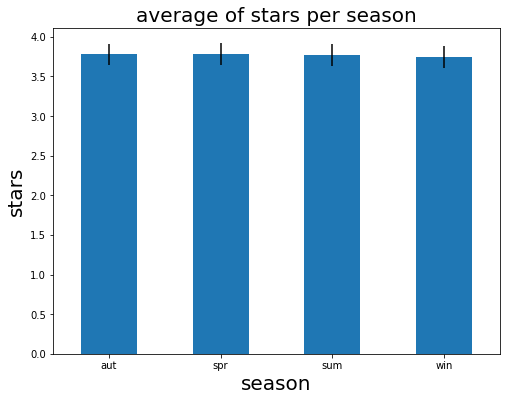

In [108]:
df_dates.groupby(by = 'period')["stars_y"].mean().plot(
    kind='bar', rot=0, figsize=(8,6), yerr = lengths_CI)
plt.ylabel('stars', fontsize=20)
plt.xlabel('season', fontsize=20)
plt.title('average of stars per season', fontsize=20)
plt.show()

The results are explained in the report

In [109]:
def difference_means_seasons(seasons):
    season1 = df_dates.groupby(by='period')["stars_y"].get_group(seasons[0]).values
    season2 = df_dates.groupby(by='period')["stars_y"].get_group(seasons[1]).values
    print('the result of the T-test for the seasons', seasons, 'is')
    print(scipy.stats.ttest_ind(season1, season2))

In [110]:
seasons =['sum', 'aut', 'spr', 'win']

In [111]:
for i in range(4):
    for j in range(i,4):
        difference_means_seasons([seasons[i], seasons[j]])

the result of the T-test for the seasons ['sum', 'sum'] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test for the seasons ['sum', 'aut'] is
Ttest_indResult(statistic=-0.13774766300705263, pvalue=0.8904486695740232)
the result of the T-test for the seasons ['sum', 'spr'] is
Ttest_indResult(statistic=-0.14898583897829876, pvalue=0.8815741921598713)
the result of the T-test for the seasons ['sum', 'win'] is
Ttest_indResult(statistic=0.5336194913014888, pvalue=0.5936413342399901)
the result of the T-test for the seasons ['aut', 'aut'] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test for the seasons ['aut', 'spr'] is
Ttest_indResult(statistic=-0.008024679338724989, pvalue=0.9935978372077926)
the result of the T-test for the seasons ['aut', 'win'] is
Ttest_indResult(statistic=0.6460488559689854, pvalue=0.518296608436478)
the result of the T-test for the seasons ['spr', 'spr'] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test for

The results are explained in the report

### Can these differences be generalized for the totality of the reviews or are these differences specific for reviews of restaurants ?

In [113]:
reviews = pd.read_pickle('reviews')

In [114]:
reviews = reviews.sample(6209)

In [115]:
reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
229791,sXLFvAKE5BIBDB_lDCED6w,xn7kERVbvlPqwLF55FtpSQ,ETWL06nidpmQPHksY_GMJA,5,3,0,0,My husband and I happened to pass this restaur...,2016-06-03 19:20:34
41759,RVbOOF8tGvvBxO_KddNTaw,X3gqqHmE62yLYJi1CCQUmQ,1b-SIUJttFwlFWTfpp0Xqg,5,1,0,0,Tassilis is a blessing. The spicy south of the...,2016-04-13 16:25:26
27714,SZl3nWg5KWoZ_zC6RZeZGA,ugpGI6jgFq_gDyaGBn1Cmw,ZmPEW8tglil6AGUtm2Svmw,5,6,3,4,This place is a gem that's for sure. There are...,2017-06-24 14:16:19
114704,B_hdDccXU7nplZ8qW0vY2w,JZMvDxSPi3M5hOJ5vxgyJQ,eqmMuOulMH42S2nYfGQNIg,2,0,0,0,"Was not busy by any means, maybe two orders ah...",2016-10-01 20:36:25
335311,5EmM_v97XHisFc8gy0y6aQ,92c5buN-nFoslXnXa0xA-Q,e0DPfELZcCnzd570l0Q5Mg,3,0,0,0,"I like that Portland has a ""must play"" venue a...",2010-09-13 07:09:27
...,...,...,...,...,...,...,...,...,...
388698,ZoQvdZthHfLY-Io6NP0neQ,vaRtbJJjR-AFGGjsIsH_Gw,R34pwzyvkhVVcLnEexvPdA,5,1,0,0,"Amazing fresh shrimp. LOVE rock shrimp, and t...",2017-06-15 22:01:34
159176,ciSIDkWD7xDq7IhtA6fXpw,8WGiLPFo8xa45WpQFNQ0EA,4EV_ZcQmjAmP3pmO-_nb2A,4,3,4,2,What I Liked: \nFast seating\nFriendly and fas...,2019-09-08 23:49:08
24015,XCKAmiQKSednmaaxeflGng,zy8DIr1RBb6vVd6cByBjNg,MrqCiqWnDneOBA4p5AXvKw,3,1,0,0,"For the price, the hotel was good. I've stayed...",2020-01-20 22:35:51
306971,fvX6M-Xtlo45lInh-e_6Vw,4Fq6aFXgY7us7ACHolnG1g,4mABhbaH-4htdXKQXIlt7g,1,0,0,0,SO ANNOYED WITH AVIS! I left a shopping bag an...,2015-07-15 19:10:03


Now we have a sample (with the same number of elements) of reviews not necessarly about restaurants.

In [116]:
reviews = reviews.drop(columns=['user_id', 'useful', 'funny', 'cool', 'text', 'business_id', 'review_id'])

In [117]:
reviews

,stars,date
229791,5,2016-06-03 19:20:34
41759,5,2016-04-13 16:25:26
27714,5,2017-06-24 14:16:19
114704,2,2016-10-01 20:36:25
335311,3,2010-09-13 07:09:27
...,...,...
388698,5,2017-06-15 22:01:34
159176,4,2019-09-08 23:49:08
24015,3,2020-01-20 22:35:51
306971,1,2015-07-15 19:10:03


In [118]:
reviews.date = reviews['date'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [119]:
reviews

,stars,date
229791,5,2016-06-03 19:20:34
41759,5,2016-04-13 16:25:26
27714,5,2017-06-24 14:16:19
114704,2,2016-10-01 20:36:25
335311,3,2010-09-13 07:09:27
...,...,...
388698,5,2017-06-15 22:01:34
159176,4,2019-09-08 23:49:08
24015,3,2020-01-20 22:35:51
306971,1,2015-07-15 19:10:03


In [120]:
lengths = []
for i in range(2005, 2022):
    data = reviews.groupby(reviews['date'].dt.year)["stars"].get_group(i).values
    lengths.append(bootstrap_CI(data, 1000)[1]-bootstrap_CI(data, 1000)[0])
print(lengths)

[1.8000000000000003, 0.80125, 0.6600000000000001, 0.43478260869565233, 0.41574675324675336, 0.31355932203389836, 0.28125, 0.3006696428571427, 0.2826781326781327, 0.24390243902439002, 0.22366288492706632, 0.20545649072753225, 0.2190140845070423, 0.21466463414634163, 0.21566570188133127, 0.27736966824644504, 1.2093749999999996]


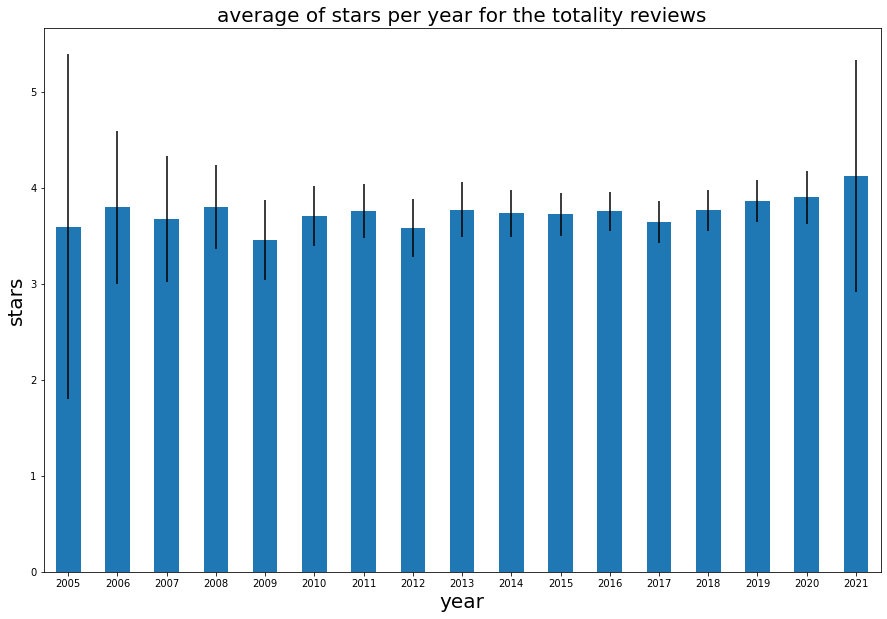

In [122]:
reviews.groupby(reviews['date'].dt.year)["stars"].mean().plot(
    kind='bar', rot=0, figsize=(15,10), yerr = lengths)
plt.ylabel('stars', fontsize=20)
plt.xlabel('year', fontsize=20)
plt.title('average of stars per year for the totality reviews', fontsize=20)
plt.show()

In [123]:
def difference_means_years(years):
    year1 = reviews.groupby(reviews['date'].dt.year)["stars"].get_group(years[0]).values
    year2 = reviews.groupby(reviews['date'].dt.year)["stars"].get_group(years[1]).values
    print('the result of the T-test for the years', years, 'is')
    print(scipy.stats.ttest_ind(year1, year2))

In [124]:
for i in range(2005,2022):
    for j in range(i,2022):
        difference_means_years([i,j])

the result of the T-test for the years [2005, 2005] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test for the years [2005, 2006] is
Ttest_indResult(statistic=-0.3733549777275496, pvalue=0.7123033989309204)
the result of the T-test for the years [2005, 2007] is
Ttest_indResult(statistic=-0.1423578202009767, pvalue=0.8873371795489848)
the result of the T-test for the years [2005, 2008] is
Ttest_indResult(statistic=-0.39647630613604745, pvalue=0.692642861776286)
the result of the T-test for the years [2005, 2009] is
Ttest_indResult(statistic=0.23429077985361377, pvalue=0.8150644972463386)
the result of the T-test for the years [2005, 2010] is
Ttest_indResult(statistic=-0.20235804959971676, pvalue=0.8398089706735467)
the result of the T-test for the years [2005, 2011] is
Ttest_indResult(statistic=-0.2777219109622963, pvalue=0.7814035153087668)
the result of the T-test for the years [2005, 2012] is
Ttest_indResult(statistic=0.016567258822742074, pvalue=0.986791590723492

the result of the T-test for the years [2010, 2013] is
Ttest_indResult(statistic=-0.617212342754254, pvalue=0.5373138524523864)
the result of the T-test for the years [2010, 2014] is
Ttest_indResult(statistic=-0.2752084537772027, pvalue=0.7832302118900798)
the result of the T-test for the years [2010, 2015] is
Ttest_indResult(statistic=-0.16462273894276802, pvalue=0.869280025712805)
the result of the T-test for the years [2010, 2016] is
Ttest_indResult(statistic=-0.4410616740586018, pvalue=0.6592703146698548)
the result of the T-test for the years [2010, 2017] is
Ttest_indResult(statistic=0.6196540351189085, pvalue=0.5356246548487573)
the result of the T-test for the years [2010, 2018] is
Ttest_indResult(statistic=-0.5404250043583575, pvalue=0.5890181428100414)
the result of the T-test for the years [2010, 2019] is
Ttest_indResult(statistic=-1.461140073182967, pvalue=0.14431659997447385)
the result of the T-test for the years [2010, 2020] is
Ttest_indResult(statistic=-1.738909256738458

The results are explained in the report

In [125]:
lengths = []
for i in range(1, 13):
    data = reviews.groupby(reviews['date'].dt.month)["stars"].get_group(i).values
    lengths.append(bootstrap_CI(data, 1000)[1]-bootstrap_CI(data, 1000)[0])
print(lengths)

[0.2538942307692307, 0.26304780876494016, 0.25381679389312994, 0.25243785850860423, 0.2635148514851484, 0.24719101123595522, 0.2583487084870848, 0.23674911660777376, 0.25, 0.22592592592592542, 0.2552824267782432, 0.272002141327623]


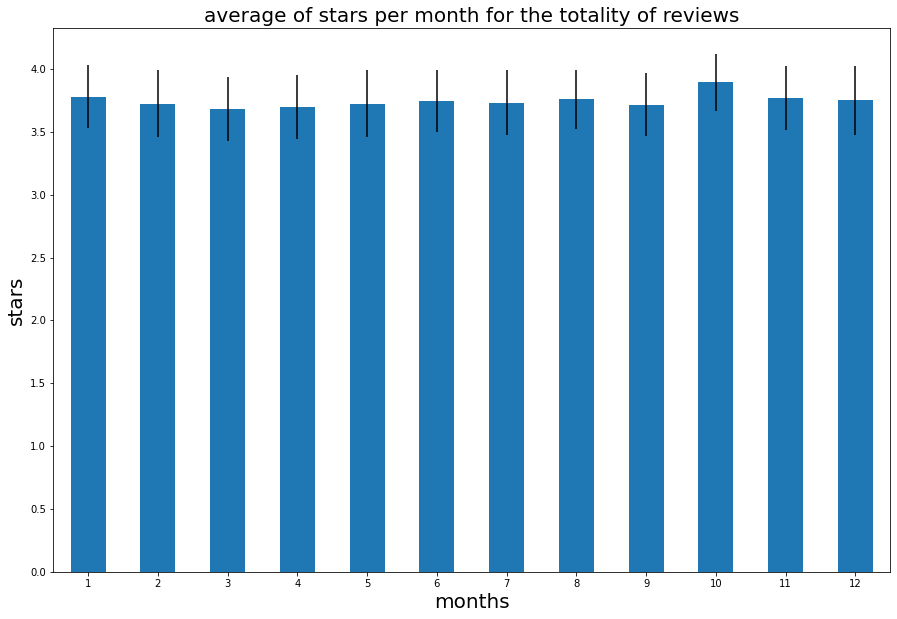

In [136]:
reviews.groupby(reviews['date'].dt.month)["stars"].mean().plot(
    kind='bar', rot=0, figsize=(15,10), yerr = lengths)
plt.ylabel('stars',fontsize=20)
plt.xlabel('months', fontsize=20)
plt.title('average of stars per month for the totality of reviews', fontsize=20)
plt.show()

In [127]:
def difference_means_months(months):
    month1 = reviews.groupby(reviews['date'].dt.month)["stars"].get_group(months[0]).values
    month2 = reviews.groupby(reviews['date'].dt.month)["stars"].get_group(months[1]).values
    print('the result of the T-test for the months', months, 'is')
    print(scipy.stats.ttest_ind(month1, month2))

In [128]:
for i in range(1,13):
    for j in range(i,13):
        difference_means_months([i,j])

the result of the T-test for the months [1, 1] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test for the months [1, 2] is
Ttest_indResult(statistic=0.6045630727916276, pvalue=0.5456038025955076)
the result of the T-test for the months [1, 3] is
Ttest_indResult(statistic=1.0866126454203453, pvalue=0.2774593312250494)
the result of the T-test for the months [1, 4] is
Ttest_indResult(statistic=0.9148694187923362, pvalue=0.36047204534018784)
the result of the T-test for the months [1, 5] is
Ttest_indResult(statistic=0.6128357589521696, pvalue=0.5401211521757239)
the result of the T-test for the months [1, 6] is
Ttest_indResult(statistic=0.3715275070954432, pvalue=0.7103194853178564)
the result of the T-test for the months [1, 7] is
Ttest_indResult(statistic=0.560204937283001, pvalue=0.5754580308490287)
the result of the T-test for the months [1, 8] is
Ttest_indResult(statistic=0.2561790749312007, pvalue=0.7978611721446625)
the result of the T-test for the months [1, 9]

The results are explained in the report

In [129]:
column_to_add = []
for el in reviews['date'].dt.month:
    if el in summer:
        column_to_add.append('sum')
    if el in autumn:
        column_to_add.append('aut')
    if el in spring:
        column_to_add.append('spr')
    if el in winter:
        column_to_add.append('win')
reviews['period']=column_to_add

In [130]:
reviews

,stars,date,period
229791,5,2016-06-03 19:20:34,sum
41759,5,2016-04-13 16:25:26,spr
27714,5,2017-06-24 14:16:19,sum
114704,2,2016-10-01 20:36:25,aut
335311,3,2010-09-13 07:09:27,aut
...,...,...,...
388698,5,2017-06-15 22:01:34,sum
159176,4,2019-09-08 23:49:08,aut
24015,3,2020-01-20 22:35:51,win
306971,1,2015-07-15 19:10:03,sum


In [131]:
lengths_CI = []
seasons = ['sum','aut', 'spr', 'win']
for season in seasons:
    data = reviews.groupby(by='period')["stars"].get_group(season).values
    lengths_CI.append(bootstrap_CI(data, 1000)[1]-bootstrap_CI(data, 1000)[0])
print(lengths_CI)

[0.13584043848964633, 0.13769659239842724, 0.14176868556701017, 0.14576897246474152]


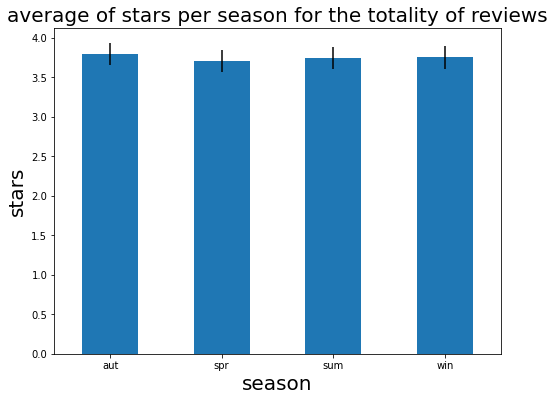

In [132]:
reviews.groupby(by = 'period')["stars"].mean().plot(
    kind='bar', rot=0, figsize=(8,6), yerr = lengths_CI)
plt.ylabel('stars', fontsize=20)
plt.xlabel('season', fontsize=20)
plt.title('average of stars per season for the totality of reviews', fontsize=20)
plt.show()

In [133]:
def difference_means_seasons(seasons):
    season1 = reviews.groupby(by='period')["stars"].get_group(seasons[0]).values
    season2 = reviews.groupby(by='period')["stars"].get_group(seasons[1]).values
    print('the result of the T-test for the seasons', seasons, 'is')
    print(scipy.stats.ttest_ind(season1, season2))

In [134]:
seasons =['sum', 'aut', 'spr', 'win']
for i in range(4):
    for j in range(i,4):
        difference_means_seasons([seasons[i], seasons[j]])

the result of the T-test for the seasons ['sum', 'sum'] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test for the seasons ['sum', 'aut'] is
Ttest_indResult(statistic=-0.9598476881846947, pvalue=0.33720517257066374)
the result of the T-test for the seasons ['sum', 'spr'] is
Ttest_indResult(statistic=0.8487899488898931, pvalue=0.39606183212657275)
the result of the T-test for the seasons ['sum', 'win'] is
Ttest_indResult(statistic=-0.12914754294285025, pvalue=0.8972492036659564)
the result of the T-test for the seasons ['aut', 'aut'] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test for the seasons ['aut', 'spr'] is
Ttest_indResult(statistic=1.8034473530446427, pvalue=0.07141579867859654)
the result of the T-test for the seasons ['aut', 'win'] is
Ttest_indResult(statistic=0.8086029119292012, pvalue=0.41880743027709966)
the result of the T-test for the seasons ['spr', 'spr'] is
Ttest_indResult(statistic=0.0, pvalue=1.0)
the result of the T-test fo

No significative difference.